In [122]:
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


/tmp/ipykernel_1696984/3620799528.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [123]:
symbols = "SPY" , "KO", "GOOG", "NKE", "V", "CL", "QQQ", "MCD"
df_multiple_symbols = yf.download(symbols, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  8 of 8 completed


In [124]:
df_multiple_symbols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, CL)    2518 non-null   float64
 1   (Adj Close, GOOG)  2518 non-null   float64
 2   (Adj Close, KO)    2518 non-null   float64
 3   (Adj Close, MCD)   2518 non-null   float64
 4   (Adj Close, NKE)   2518 non-null   float64
 5   (Adj Close, QQQ)   2518 non-null   float64
 6   (Adj Close, SPY)   2518 non-null   float64
 7   (Adj Close, V)     2518 non-null   float64
 8   (Close, CL)        2518 non-null   float64
 9   (Close, GOOG)      2518 non-null   float64
 10  (Close, KO)        2518 non-null   float64
 11  (Close, MCD)       2518 non-null   float64
 12  (Close, NKE)       2518 non-null   float64
 13  (Close, QQQ)       2518 non-null   float64
 14  (Close, SPY)       2518 non-null   float64
 15  (Close, V)         2518 non-null   float64
 16  (High,

In [125]:
df_multiple_symbols = df_multiple_symbols["Close"]
df_multiple_symbols

,CL,GOOG,KO,MCD,NKE,QQQ,SPY,V
Date,,,,,,,,
2013-01-02,53.154999,18.013729,37.599998,90.120003,25.920000,67.199997,146.059998,38.845001
2013-01-03,53.330002,18.024191,37.599998,90.629997,26.184999,66.849998,145.729996,38.875000
2013-01-04,53.950001,18.380356,37.660000,89.849998,26.440001,66.629997,146.369995,39.192501
2013-01-07,53.040001,18.300158,37.299999,90.910004,26.480000,66.650002,145.970001,39.472500
2013-01-08,53.160000,18.264042,37.040001,90.940002,26.200001,66.519997,145.550003,39.840000
...,...,...,...,...,...,...,...,...
2022-12-23,79.449997,89.809998,63.820000,267.570007,116.250000,267.359985,382.910004,205.830002
2022-12-27,79.940002,87.930000,64.209999,266.839996,117.559998,263.579987,381.399994,206.289993
2022-12-28,78.820000,86.459999,63.570000,265.109985,114.980003,260.100006,376.660004,204.990005


In [126]:
#ainult SPY ja DataFrameks
df_multiple_symbols = pd.DataFrame(df_multiple_symbols['SPY']) 

In [127]:
df_multiple_symbols['SMA1'] = df_multiple_symbols['SPY'].rolling(55).mean() 
df_multiple_symbols['SMA2'] = df_multiple_symbols['SPY'].rolling(252).mean() 


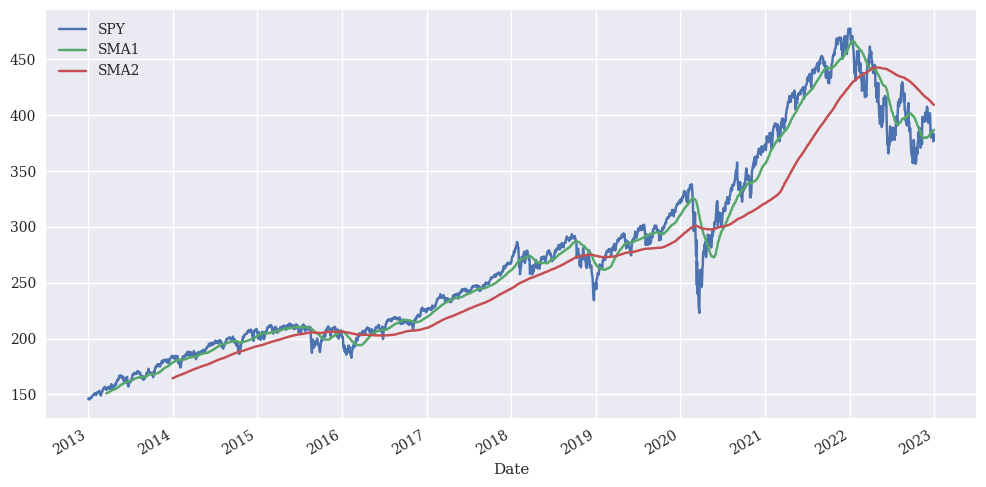

In [128]:
df_multiple_symbols.plot(figsize=(12, 6));

In [129]:
df_multiple_symbols.tail()

,SPY,SMA1,SMA2
Date,,,
2022-12-23,382.910004,385.369637,410.678811
2022-12-27,381.399994,385.708000,410.298414
2022-12-28,376.660004,386.010546,409.900755
2022-12-29,383.440002,386.477819,409.527580
2022-12-30,382.429993,386.948182,409.155636


/tmp/ipykernel_1696984/3201822249.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


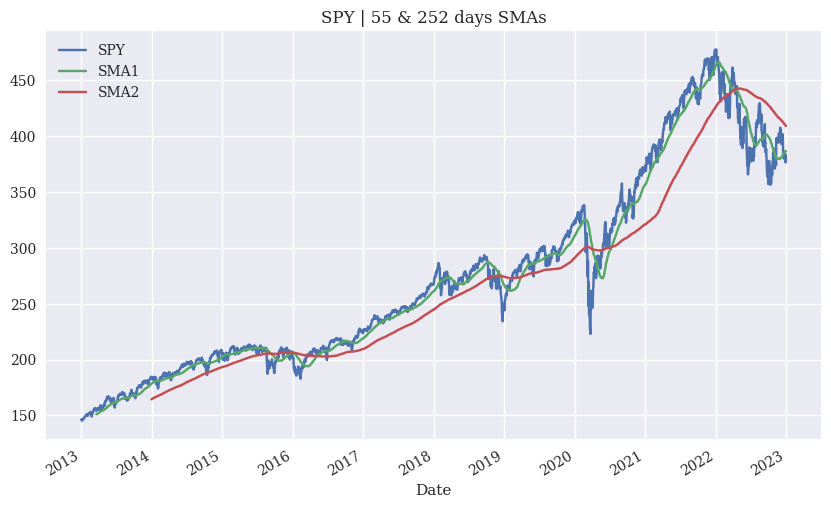

In [130]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
df_multiple_symbols.plot(title='SPY | 55 & 252 days SMAs',
figsize=(10, 6));

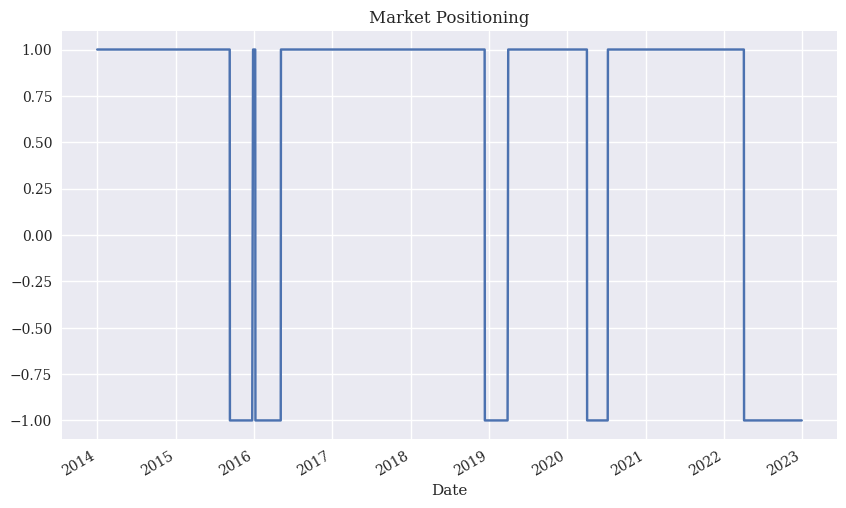

In [131]:
df_multiple_symbols['position'] = np.where(df_multiple_symbols['SMA1'] > df_multiple_symbols['SMA2'], 1, -1)
df_multiple_symbols.dropna(inplace=True) 
df_multiple_symbols['position'].plot(ylim=[-1.1, 1.1],title='Market Positioning',figsize=(10, 6));

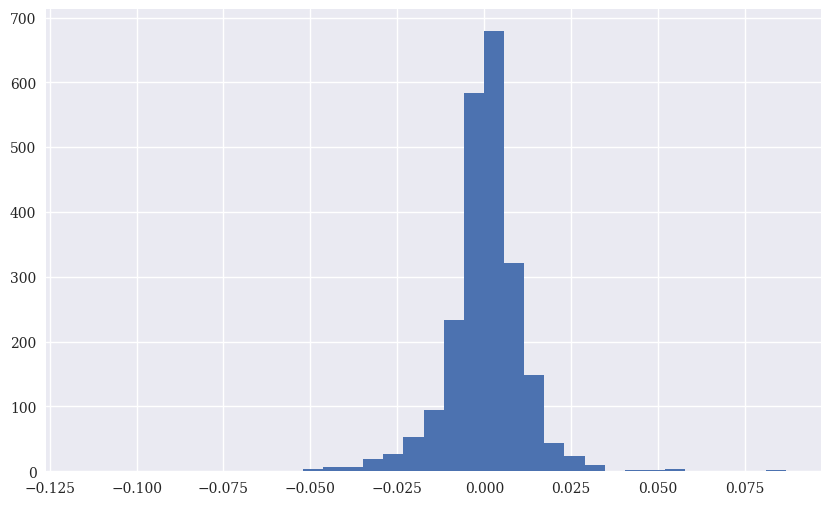

In [132]:
df_multiple_symbols['returns'] = np.log(df_multiple_symbols['SPY'] / df_multiple_symbols['SPY'].shift(1)) 
df_multiple_symbols['returns'].hist(bins=35, figsize=(10, 6)); 

In [133]:
df_multiple_symbols['strategy'] = df_multiple_symbols['position'].shift(1) * df_multiple_symbols['returns'] 
df_multiple_symbols[['returns', 'strategy']].sum()


returns     0.727867
strategy    0.213307
dtype: float64

In [134]:
df_multiple_symbols[['returns', 'strategy']].sum().apply(np.exp) 

returns     2.070659
strategy    1.237765
dtype: float64

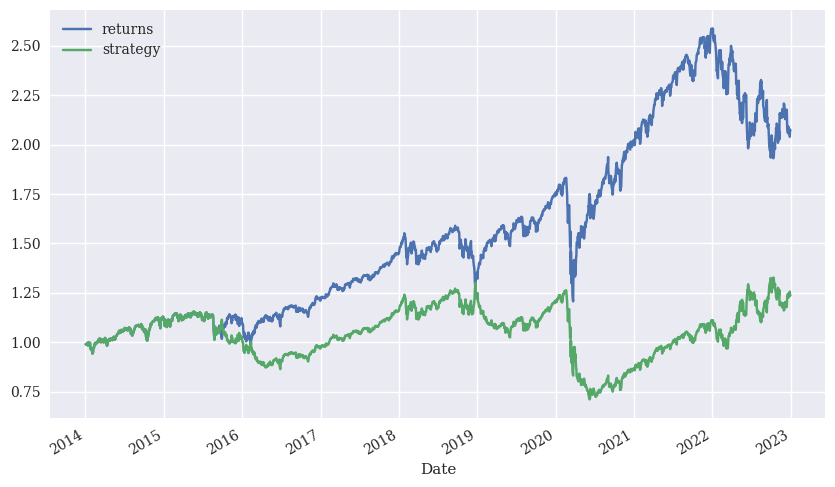

In [135]:
df_multiple_symbols[['returns', 'strategy']].cumsum( ).apply(np.exp).plot(figsize=(10, 6));